9_neda_mimfpt_(ML_KNNC)

Engin Abdan

### Libraries

In [122]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D 
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

import pickle

from scipy.stats import skew
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('classic')

### Data

In [123]:
stu = pd.read_excel("std_ins_ml_data.xlsx")

In [124]:
stu.head(1)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap


In [125]:
drop_list = ["Unnamed: 0", "Flight_Mean","MI_Cat"]
stu.drop(drop_list, inplace=True, axis=1)
stu.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not
0,20,19,10,16,13,16,17,22,1


### Data infos

In [126]:
stu.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.000,17.720,3.069,11.000,16.000,17.000,20.000,26.000
Math_Int,100.000,17.750,3.655,10.000,15.000,17.000,19.000,33.000
Spa_Int,100.000,17.810,3.047,10.000,15.750,17.500,20.000,26.000
Mus_Int,100.000,17.860,3.111,10.000,16.000,17.500,20.000,26.000
Nat_Int,100.000,18.160,3.741,10.000,15.750,18.000,20.000,33.000
Body_Int,100.000,17.200,2.670,10.000,15.000,17.000,19.000,23.000
Interp_Int,100.000,17.780,2.866,12.000,16.000,18.000,19.000,26.000
Intrap_Int,100.000,18.070,2.875,13.000,16.000,18.000,20.000,26.000
Plt_Or_Not,100.000,0.580,0.496,0.000,0.000,1.000,1.000,1.000


### Data Balance

In [127]:
stu["Plt_Or_Not"].value_counts()

1    58
0    42
Name: Plt_Or_Not, dtype: int64

### Skewness

In [128]:
x = stu.drop(columns=["Plt_Or_Not"]).columns
for i in x:
    if skew(stu[i]) >= -0.5 and skew(stu[i]) < 0.5:
        print(f"{i} \t: {skew(stu[i])} \t>>> Normal")
    elif skew(stu[i]) >= 0.5 and skew(stu[i]) < 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Moderate")
    elif skew(stu[i]) >= 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Heatmap

In [129]:
# plt.figure(figsize=(20,10))
# sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
# plt.tight_layout();

### Pairplot

In [130]:
#sns.pairplot(stu,hue="Plt_Or_Not");

### Corr With Plt_Or_Not

<AxesSubplot:>

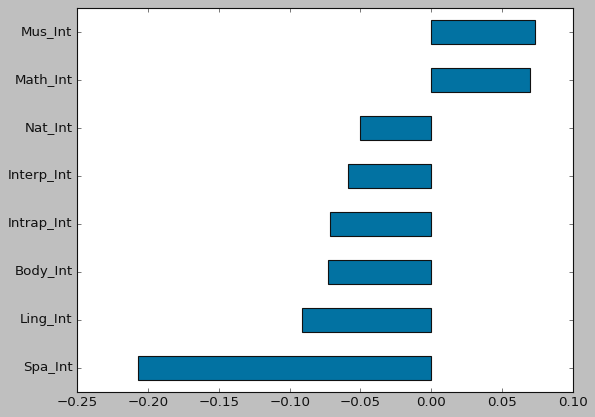

In [131]:
stu.corr()["Plt_Or_Not"].drop("Plt_Or_Not").sort_values().plot.barh()

### Train Test Split

In [132]:
from sklearn.model_selection import train_test_split

x = stu.drop(columns=["Plt_Or_Not"], axis=1)
y = stu["Plt_Or_Not"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (70, 8)
Train target shape   :  (70,)
Test features shape  :  (30, 8)
Test target shape    :  (30,)


### Scaling

In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Model

In [134]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(x_train_scaled, y_train)

y_test_pred=knn_model.predict(x_test_scaled)
y_test_pred_proba = knn_model.predict_proba(x_test_scaled)

y_train_pred=knn_model.predict(x_train_scaled)
y_train_pred_proba = knn_model.predict_proba(x_train_scaled)

### Model Performance

In [135]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 2 14]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.50      0.12      0.20        16
           1       0.46      0.86      0.60        14

    accuracy                           0.47        30
   macro avg       0.48      0.49      0.40        30
weighted avg       0.48      0.47      0.39        30



### Elbow For Best "k" Value

In [136]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [137]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k, p =1, weights="uniform")
    
    knn_model.fit(x_train_scaled, y_train) 
   
    pred = knn_model.predict(x_test_scaled)
    
    test_error = 1 - accuracy_score(y_test, pred)
    test_error_rates.append(test_error)

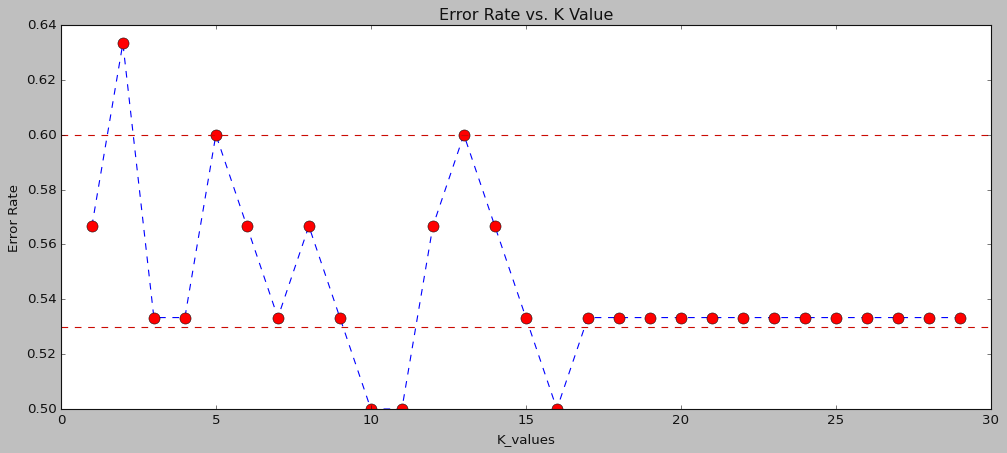

In [138]:
plt.figure(figsize=(15,6))

plt.plot(range(1,30),
         test_error_rates,
         color='blue',
         linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.53, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.60, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

### GridSearch For Best "k" Value

In [139]:
from sklearn.model_selection import GridSearchCV

knn_grid = KNeighborsClassifier()
k_values= range(1,30)

param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

knn_grid_model.fit(x_train_scaled, y_train)

knn_grid_model.best_params_

{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}

In [140]:
### KNN With k=20
knn = KNeighborsClassifier(n_neighbors=20, p =1, weights="uniform")

knn.fit(x_train_scaled, y_train)
pred = knn.predict(x_test_scaled)

print('WITH K=20')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

WITH K=20
[[ 0 16]
 [ 0 14]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.47      1.00      0.64        14

    accuracy                           0.47        30
   macro avg       0.23      0.50      0.32        30
weighted avg       0.22      0.47      0.30        30



In [141]:
### KNN With k=4

knn = KNeighborsClassifier(n_neighbors=4, p =1, weights="uniform")

knn.fit(x_train_scaled, y_train)
pred = knn.predict(x_test_scaled)

print('WITH K=4')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

WITH K=4
[[ 6 10]
 [ 6  8]]
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        16
           1       0.44      0.57      0.50        14

    accuracy                           0.47        30
   macro avg       0.47      0.47      0.46        30
weighted avg       0.47      0.47      0.46        30



### Cross Validate For Best "k=4" 

In [142]:
from sklearn.model_selection import cross_validate

model = KNeighborsClassifier(n_neighbors=4, p =1, weights="uniform")

scores = cross_validate(model,
                        x_train_scaled,
                        y_train,
                        scoring = ['accuracy',
                                   'precision',
                                   'recall',
                                   'f1'],
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.557
test_precision   0.670
test_recall      0.620
test_f1          0.624
dtype: float64

### ROC/AUC For Best "k=4"

In [143]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

In [144]:
knn_model = KNeighborsClassifier(n_neighbors=4, p =1, weights="uniform")

knn_model.fit(x_train_scaled, y_train)

print(roc_auc_score(y_test, y_test_pred_proba[:,1]))
print(average_precision_score(y_test, y_test_pred_proba[:,1]))

0.4017857142857143
0.42208806599562904


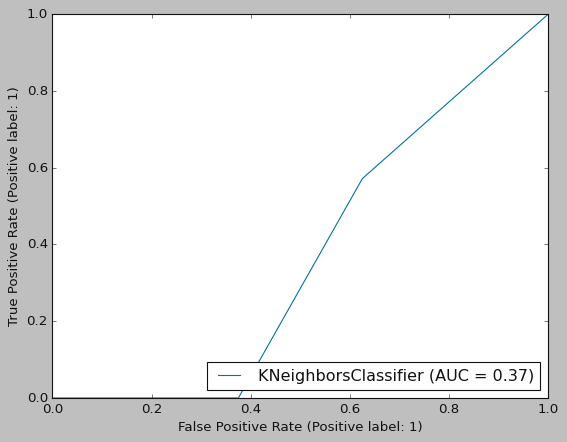

In [145]:
plot_roc_curve(knn_model, x_test_scaled, y_test)

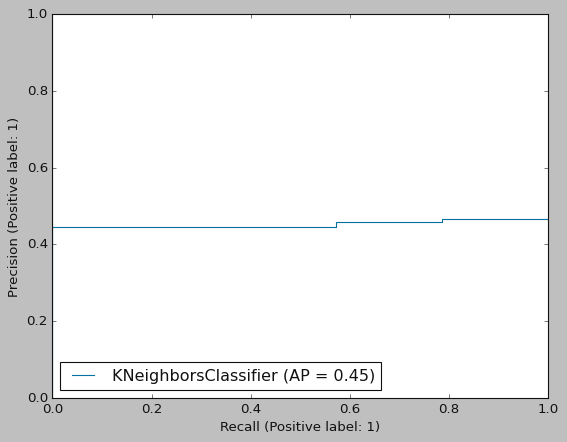

In [146]:
plot_precision_recall_curve(knn_model, x_test_scaled, y_test);

### Best Threshold

In [147]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, average_precision_score

In [148]:
from sklearn.ensemble import RandomForestClassifier 

model = KNeighborsClassifier(n_neighbors=4, p =1, weights="uniform")
model.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

In [149]:
y_test_pred = model.predict(x_test_scaled)
y_test_pred_proba = model.predict_proba(x_test_scaled)

In [150]:
test_data = pd.concat([x_test, y_test], axis=1)
test_data["pred1"] = y_test_pred
test_data["pred_proba"] = y_test_pred_proba[:,1]
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred1,pred_proba
83,22,19,13,18,21,18,15,19,1,1,0.750
53,17,13,18,13,13,22,23,20,1,0,0.250
70,21,16,16,16,19,18,18,20,1,1,0.750
45,14,14,15,26,20,13,20,14,1,0,0.500
44,16,17,16,17,21,19,18,20,0,1,1.000


In [151]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 6 10]
 [ 6  8]]
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        16
           1       0.44      0.57      0.50        14

    accuracy                           0.47        30
   macro avg       0.47      0.47      0.46        30
weighted avg       0.47      0.47      0.46        30



In [152]:
y_train_pred_proba = model.predict_proba(x_train_scaled)
roc_auc_score(y_train, y_train_pred_proba[:,1])

fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
optimal_threshold_rac

0.75

In [153]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_rac else 0)
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred1,pred_proba,pred2
83,22,19,13,18,21,18,15,19,1,1,0.750,1
53,17,13,18,13,13,22,23,20,1,0,0.250,0
70,21,16,16,16,19,18,18,20,1,1,0.750,1
45,14,14,15,26,20,13,20,14,1,0,0.500,0
44,16,17,16,17,21,19,18,20,0,1,1.000,1


In [154]:
y_pred2 = test_data["pred2"]
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[ 6 10]
 [ 6  8]]
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        16
           1       0.44      0.57      0.50        14

    accuracy                           0.47        30
   macro avg       0.47      0.47      0.46        30
weighted avg       0.47      0.47      0.46        30



In [155]:
y_train_pred_proba = model.predict_proba(x_train_scaled)
average_precision_score(y_train, y_train_pred_proba[:,1])

precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold_prc = thresholds[optimal_idx]
optimal_threshold_prc

0.5

In [156]:
test_data["pred3"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_prc else 0)
test_data.head()

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred1,pred_proba,pred2,pred3
83,22,19,13,18,21,18,15,19,1,1,0.750,1,1
53,17,13,18,13,13,22,23,20,1,0,0.250,0,0
70,21,16,16,16,19,18,18,20,1,1,0.750,1,1
45,14,14,15,26,20,13,20,14,1,0,0.500,0,1
44,16,17,16,17,21,19,18,20,0,1,1.000,1,1


In [157]:
y_pred3 = test_data["pred3"]
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[ 3 13]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.50      0.19      0.27        16
           1       0.46      0.79      0.58        14

    accuracy                           0.47        30
   macro avg       0.48      0.49      0.43        30
weighted avg       0.48      0.47      0.42        30



### Prediction

In [158]:
from sklearn.preprocessing import MinMaxScaler
knn_scaler = MinMaxScaler()
x_scaled = knn_scaler.fit_transform(x)

In [159]:
from sklearn.neighbors import KNeighborsClassifier

final_model = KNeighborsClassifier(n_neighbors=4, p =1, weights="uniform")
final_model.fit(x_scaled, y)

KNeighborsClassifier(n_neighbors=4, p=1)

In [160]:
columns_name = x.columns

In [161]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [162]:
pred_data_scaled = knn_scaler.transform(pred_data)
pred_data_scaled

array([[1.6       , 1.13043478, 1.5       , 1.6875    , 0.2173913 ,
        0.53846154, 0.5       , 0.61538462]])

In [163]:
print("optimal_threshold_rac:", optimal_threshold_rac)
print()
print("optimal_threshold_prc:", optimal_threshold_prc)

optimal_threshold_rac: 0.75

optimal_threshold_prc: 0.5


In [164]:
predictions1 = model.predict(pred_data_scaled)[0]
predictions1

0

In [165]:
predictions_proba = model.predict_proba(pred_data_scaled)
print(predictions_proba[0])
print(predictions_proba[0][0])
print(predictions_proba[0][1])

[0.75 0.25]
0.75
0.25


In [166]:
predictions2 = [1 if predictions_proba[0][1] >= optimal_threshold_rac else 0][0] 
predictions2

0

In [167]:
pred_data["pred1"] = predictions1
pred_data["pred_proba_0"] = predictions_proba[0][0]
pred_data["pred2"] = predictions2
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,pred1,pred_proba_0,pred2
0,35,36,34,37,15,17,19,21,0,0.750,0


In [168]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Best_Threshold = optimal_threshold_rac

if predictions_proba[0][1] >= Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba_1\t: {predictions_proba[0][1]}\nPrediction\t\t: 1\nResult\t\t\t: Pilot")
if predictions_proba[0][1] < Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba_1\t: {predictions_proba[0][1]}\nPrediction\t\t: 0\nResult\t\t\t: Not Pilot")

MI_Cat			: Mus_Int
MI_Score		: 37
Best_Threshold		: 0.75
Predictions_Proba_1	: 0.25
Prediction		: 0
Result			: Not Pilot
